<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week04_MultilinearRegression_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4
# Multilinear Regression

Last time we looked at a simple linear regression model $sales = \beta_0 + \beta_1\cdot\textit{TV advertising budget}$. More generally, a linear model makes a prediction by computing a weighted sum of their input features (plus a constant).

**Reading: Chapter 4**

## Multilinear Regression: Model Assumptions
**Model**:

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n$
1. $\hat{y}$ is the predicted value.
2. $n$ is the number of features.
3. $x_i$ is the i-th feature value.
4. $\theta_i$ is the i-th model parameter (associated with $x_i$).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set print format on floating point numbers
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
%matplotlib inline

In [2]:
# Toy example
# columns = ['Homework', 'Midterm', 'Final']
data = pd.DataFrame({
    "Homework": [95, 70, 80, 100, 70],
    "Midterm": [90, 60, 80, 80, 85],
    "Final": [93, 66, 85, 60, 90]
}, index=["Alice", "Bob", "Clare", "David", "Eve"])

data

,Homework,Midterm,Final
Alice,95,90,93
Bob,70,60,66
Clare,80,80,85
David,100,80,60
Eve,70,85,90


In this case:
- $x_1$ is the homework feature
- $x_2$ is the midterm feature
- $y$ is the final score
- model is: $final = \theta_0 + \theta_1 * homework + \theta_2 * midterm$
- We need to come up with values for $\theta_0, \theta_1, \theta_2$ to complete the model.

**Objective**: Suppose that another student Fred has Homework score 85 and Midterm score 80. What is prediction of his final exam score?

## Multilinear Regression: Vectorized form

The multilinear model can also be written as:

**$\hat{y} = \theta\cdot\textbf{x}$**.
1. $\theta = (\theta_0, \theta_1, ..., \theta_n)$ is the paramter vector.
2. $\textbf{x} = (1, x_1, ..., x_n)$ is the feature vector.
3. The symbol $\cdot$ represents the inner-product of two vectors. For example, $(1, 2, 3)\cdot (4, 5, 6) = 1\times 4 + 2\times 5 + 3\times 6 = 32$.

**Why is the expression $\theta\cdot\textbf{x}$ equivalent to $\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n$?**

In [3]:
# Let's apply the linear regression tool in sci-kit learn on the toy example
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data[["Homework", "Midterm"]], data['Final']) 

LinearRegression()

In [4]:
# What is the prediction of Fred's final score?

# Create a dataframe with Fred's records
fred = pd.DataFrame([[85, 80]], columns=["Homework", "Midterm"], index=['Fred'])
fred
model.predict(fred)

array([78.67442])

In [5]:
# Model's prediction is 78. This looks safe. But how much variation the prediction has?
# We can use model's error on the training data seems pretty good,
# but how well does it do on new data?

data['Prediction'] = model.predict(data[['Homework', 'Midterm']])
data

,Homework,Midterm,Final,Prediction
Alice,95,90,93,84.581395
Bob,70,60,66,63.279070
Clare,80,80,85,82.255814
David,100,80,60,67.930233
Eve,70,85,90,95.953488


In [6]:
# Retrieve the estimated parameter values.
print("theta1, theta2:", model.coef_)
print("theta0:", model.intercept_)

theta1, theta2: [-0.71628 1.30698]
theta0: 35.00000000000003


Now, let's create a linear model that describes the relationship between `sales` and all three ways of advertising.

In [7]:
url = "https://www.statlearning.com/s/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Proposed model: $sales = \theta_0 + \theta_1\cdot TV + \theta_2\cdot radio + \theta_3\cdot newspaper$.

In order to effectively evalution the model's performance on new data, we need to split the data set into a **training set** and a **test set**. The model will be training with the training set only, and therefore the test set can be considered as new data to the model.

In [8]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(advertising, test_size=0.1) # a good test size is 10% - 30%
print(training_set.shape)
print(test_set.shape)

(180, 4)
(20, 4)


In [9]:
# train_test_split can split more than one data set
input = advertising[['TV', 'radio', 'newspaper']]
# input.head()
output = advertising[['sales']]
# output.head()
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2)

In [10]:
# Ex: Build a linear regression model named "model2" on the training set.
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(training_set[['TV', 'radio', 'newspaper']], training_set['sales'])

LinearRegression()

In [11]:
# Ex: Calculate the MSE of model2 on the test set
from sklearn.metrics import mean_squared_error
# Find the coefficients of the model
theta1, theta2, theta3 = model2.coef_
theta0 = model2.intercept_
print(theta0, theta1, theta2, theta3)

# Find the model's prediction on each test record
test_set['Prediction'] = theta1 * test_set['TV'] + theta2 * test_set['radio'] \
            + theta3 * test_set['newspaper'] + theta0

test_set.head()

# Calculate the MSE
MSE = mean_squared_error(test_set['sales'], test_set['Prediction'])
print("Mean squared error:", MSE)

# Compare this MSE with the MSE from last time.

2.8768864012803057 0.04600403147445695 0.19133675892693483 -0.002305170946470897
Mean squared error: 2.0230535671876586


In [12]:
# Alternatively, we can use the model's predict() method to obtain the predictions
from sklearn.metrics import mean_squared_error
test_set['Prediction'] = model2.predict(test_set[['TV', 'radio', 'newspaper']])
# test_set.head()

MSE = mean_squared_error(test_set['sales'], test_set['Prediction'])
print("Mean squared error:", MSE)

Mean squared error: 2.0230535671876586


## Multilinear Regression: Cost Function
In order to calculate the best value for each parameter, we need a **cost function** that evaluates the errors made by a give set of parameter values. Here we use the **mean squared error (MSE)** function as the cost function:

$J(\textbf{X}, \theta) = \frac{1}{m}\sum_{i=1}^{m}\big(\theta\cdot\textbf{x}^{(i)} - y^{(i)}\big)^2$

Here $(\textbf{x}^{(i)}, y^{(i)})$ represents the i-th training example

In [13]:
# Ex: Calculate the MSE cost of the toy example for the parameter values given by sci-kit learn.

# theta1, theta2 = model.coef_
# theta0 = model.intercept_
# print(theta0, theta1, theta2)

predictions = model.predict(data[['Homework', 'Midterm']])
# print(predictions)
MSE = mean_squared_error(data['Final'], predictions)
print(MSE)

36.82790697674421


## Multilinear Regression: Training Algorithm 1
The value of $\theta$ that minimizes the cost function is given by the following **normal equation**:

$\hat{\theta} = \big(\textbf{X}^T\cdot\textbf{X}\big)^{-1}\cdot\textbf{X}^T\cdot\textbf{y}$.

1. $\textbf{X}$ is an $m\times (n+1)$ matrix whose i-th row is $\textbf{x}^{(i)}$.
$$\textbf{X} = \begin{pmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_n \\
1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_n \\
\vdots & \vdots &\vdots & \ddots & \vdots \\
1 & x^{(m)}_1 & x^{(m)}_2 & \cdots & x^{(m)}_n \\
\end{pmatrix}$$
2. $$\textbf{y} = \begin{pmatrix}y^{(1)} \\ \vdots \\ y^{(m)}\end{pmatrix}$$.
3. The cost function $J(\theta)$ also has a matrix expression
$$J(\theta) = \frac{1}{m}(\textbf{X}\cdot\theta - \textbf{y})^T\cdot (\textbf{X}\cdot\theta - \textbf{y})$$

In [14]:
# Ex: Construct matrix X using DataFrame.values, np.hstack(), np.ones()
# training_set.head()
X1 = np.ones([len(training_set), 1])
# print(X1)
X2 = training_set[['TV', 'radio', 'newspaper']].values
# print(X2)
X = np.hstack([X1, X2])
print(X.shape)

(180, 4)


In [15]:
# Ex: Construct vector y
y = training_set[['sales']].values
print(y.shape)

(180, 1)


In [16]:
# Apply the normal equation to find theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)

[[2.87689]
 [0.04600]
 [0.19134]
 [-0.00231]]


In [17]:
# The results should be the same as the sklearn model
print(model2.coef_)
print(model2.intercept_)

[0.04600 0.19134 -0.00231]
2.8768864012803057


## Multilinear Regression: Training Algorithm 2
The normal equation is not applicable when $\textbf{X}^T\cdot\textbf{X}$ is not invertible. It happens if:
- Several features are linearly dependent (for example, feature3 = feature1 + feature2)
- The number of features is greater than the number of training data (for example, DNA data)

When the matrix $\textbf{X}$ is too large, the normal equation may take too long to finish since it requires a matrix multiplication.

In these cases, we can use the **gradient descent** method to minimize the cost function instead.

Gradient descent with one variable ideally looks like this:
<img src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." width="600">

Gradient descent with two variables ideally looks like this:
<img src="https://blog.paperspace.com/content/images/2019/09/F1-02.large.jpg" width="600">

Gradient descent is an iterative algorithm for finding the **local minimum** of a differentiable function.
- Choose an initial value of $\hat{\theta}$ and a **learning rate** $r$.
- For each iteration $k$, do:
  - Calculate the partial derivative of the cost function:
$$
\frac{\partial J(\hat{\theta})}{\partial \theta} = \frac{2}{m}\cdot\textbf{X}^T\cdot(\textbf{X}\cdot\theta - \textbf{y}).
$$
  - Update the parameter vector:
  $$\hat{\theta} \leftarrow \hat{\theta} - r\cdot\frac{\partial J(\hat{\theta})}{\partial \theta}.$$

- **Verify the formula of partial derivative assuming there is one input feature.**

- End iteration if certain stop criteria is reached, such as:
    - Value of $\hat{\theta}$ becomes stable.
    - Certain iteration amount is reached.

In [18]:
# Choose an initial value for each parameter.
theta = np.array([[3.00],
                  [0.05],
                  [0.20],
                  [0.00]])

In [19]:
# Construct matrix X and y
N = training_set.shape[0]

col1 = np.ones([N, 1])
col234 = training_set[['TV', 'radio', 'newspaper']].values
X = np.hstack([col1, col234])

y = training_set[['sales']].values

In [27]:
def MSE_cost(theta, X, y):
    m = X.shape[0]
    M = X.dot(theta) - y
    return 1/m * M.T.dot(M)

print("Initial cost:", MSE_cost(theta, X, y))

Initial cost: [[2.87321]]


In [28]:
# Perform gradient descent once.
# Choose a learning rate r
r = 1e-5 # r = 0.00001

# 1. Calculate the gradient
m = len(training_set)
gradient = 2/m * X.T.dot(X.dot(theta) - y)
print("Gradient: \n", gradient)

# 2. Update the parameters
theta = theta - r * gradient
print("Theta: \n", theta)


# 3. (optional) Show the MSE cost with new parameter values
MSE_cost(theta, X, y)

Gradient: 
 [[0.03527]
 [-0.00015]
 [0.00099]
 [-0.00096]]
Theta: 
 [[2.99915]
 [0.04567]
 [0.19001]
 [-0.00304]]


array([[2.87321]])

In [22]:
# Perform gradient descent multiple times
r = 1e-5

theta = np.array([[3.00],
                  [0.05],
                  [0.20],
                  [0.00]])

# theta = np.array([[6.00],
#                   [-0.10],
#                   [-0.40],
#                   [0.00]])

MSEs = [] # store the intermediate MSEs
num_iterations = 2000

for i in range(num_iterations):

    gradient = (2/m) * X.T.dot(X.dot(theta) - y)
    theta = theta - r * gradient

    if i % 100 == 0:
        print("Iteration:", i)
        print("Gradient:\n", gradient)
        print("New theta:\n", theta)
        MSE = MSE_cost(theta, X, y)
        print("New cost:", MSE)
        MSEs.append(MSE[0][0])


Iteration: 0
Gradient:
 [[1.99522]
 [359.41169]
 [52.26402]
 [66.26656]]
New theta:
 [[2.99998]
 [0.04641]
 [0.19948]
 [-0.00066]]
New cost: [[3.07382]]
Iteration: 100
Gradient:
 [[0.06717]
 [-0.45790]
 [2.54879]
 [0.86331]]
New theta:
 [[2.99987]
 [0.04526]
 [0.19490]
 [-0.00435]]
New cost: [[2.87897]]
Iteration: 200
Gradient:
 [[0.04763]
 [-0.11789]
 [1.29377]
 [-0.26988]]
New theta:
 [[2.99981]
 [0.04551]
 [0.19309]
 [-0.00446]]
New cost: [[2.87543]]
Iteration: 300
Gradient:
 [[0.04197]
 [-0.04310]
 [0.80244]
 [-0.35327]]
New theta:
 [[2.99977]
 [0.04558]
 [0.19208]
 [-0.00412]]
New cost: [[2.87425]]
Iteration: 400
Gradient:
 [[0.03957]
 [-0.02237]
 [0.53591]
 [-0.27595]]
New theta:
 [[2.99973]
 [0.04561]
 [0.19142]
 [-0.00381]]
New cost: [[2.87371]]
Iteration: 500
Gradient:
 [[0.03820]
 [-0.01403]
 [0.36608]
 [-0.19658]]
New theta:
 [[2.99969]
 [0.04563]
 [0.19098]
 [-0.00357]]
New cost: [[2.87346]]
Iteration: 600
Gradient:
 [[0.03731]
 [-0.00943]
 [0.25167]
 [-0.13682]]
New theta:

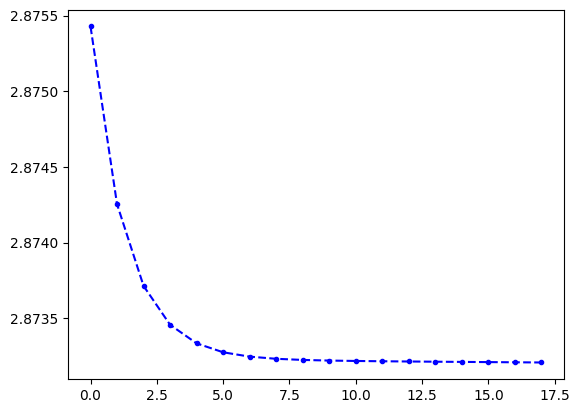

In [23]:
# Plot the learning curve.

plt.plot(range(len(MSEs)-2), MSEs[2:], 'b.--')

**Discussion**
1. Change $r$ to 0.000001 and 0.01. Observe the MSE curve.
2. Do the initial parameter values matter?
3. How to determine when to stop the iteration?

In [24]:
# As a comparison, let's calculate the MSE on the training set with optimal parameter values
best_theta = np.hstack([model2.intercept_, model2.coef_, ])
print(best_theta)

predictions = model2.predict(training_set[['TV', 'radio', 'newspaper']])
best_MSE = mean_squared_error(training_set['sales'], predictions)
print(best_MSE)

[2.87689 0.04600 0.19134 -0.00231]
2.8710513996748257
